<a href="https://colab.research.google.com/github/cool60334/111-TibaMe-AI-03-Deep-Learning/blob/main/DL_CNN_Cifar10%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets.cifar10 import load_data

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

truck


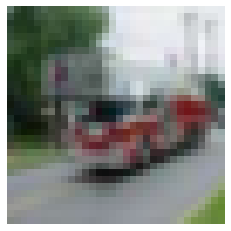

In [6]:
c = random.randint(0, 49999)
plt.axis("off")

# print(y_train[c]) # print的結果是list，方便之後擴充
category = y_train[c][0]

print(trans[category])

plt.imshow(x_train[c])

# 資料預處理

In [7]:
# 資料預處理(題目)
# 卷積不必將資料攤開成一維
# 將題目Normalize成0~1的數
x_train_shape = x_train / 255.0
x_test_shape = x_test / 255.0

In [8]:
# 將答案reshape成為一個list
y_train_cat = y_train.reshape(-1)
y_test_cat = y_test.reshape(-1)

# 建立模型

In [9]:
from keras.models import Sequential # 支架
from keras.layers import Dense, Flatten  # 全連接層，平坦層
from keras.layers import Conv2D, MaxPooling2D  # 卷積，池化

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten

# 卷積層Conv2D(過濾器數目，(過濾器寬高 寬高相同可只輸入一個數字)，
#               input_shape -> 輸入多維的圖的尺寸，
#               padding -> 做完卷積後補一圈，激活函式)

# 一個filter寬高為(3 * 3 * 3) * 64個filters + 64個bias = 1792個參數

layers = [
    
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 64) * 128(種) + 128(bias) = 73856個參數
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),  # GAP 把2*2的圖的4個分數做平均，將位置資訊撇除，最後剩下1*512層共512個值
    Dense(10, activation="softmax")

]
cnn = Sequential(layers)
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

# 確定模型訓練方式

In [11]:
# 確定模型訓練方式
# loss -> 最後答案為0或1，使用binary_crossentropy，最後答案有多個，使用categorical_crossentropy
# optimizer -> 做梯度下降的時候優化(基於動量)
from tensorflow.keras.losses import SparseCategoricalCrossentropy # Sparse表示保留非0位置

cnn.compile(loss = SparseCategoricalCrossentropy(), 
            metrics = ["accuracy"],
            optimizer = "adam")

# 訓練模型

In [12]:
# batch -> 看幾筆資料就做一次梯度下降
# epochs -> 整份資料看幾次
# 10個epochs， 200batch = 60000 * 10 / 200 = 3000次梯度修正
# verbose -> 2: 去除進度條

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    # ModelCheckpoint("cnn.h5", save_best_only=True),  # 儲存最好係數的模型
    EarlyStopping(patience=5, restore_best_weights=True)  # 當訓練成效跟最好的比不佳n次時，就及早停止 restore_best_weights=True 回到最好那次的係數
        ]

cnn.fit(
    x_train_shape,
    y_train_cat,
    batch_size=200,
    epochs=50,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=2
    )

Epoch 1/50
225/225 - 13s - loss: 1.6775 - accuracy: 0.3812 - val_loss: 1.3446 - val_accuracy: 0.5024 - 13s/epoch - 60ms/step
Epoch 2/50
225/225 - 4s - loss: 1.2499 - accuracy: 0.5505 - val_loss: 1.0936 - val_accuracy: 0.6096 - 4s/epoch - 19ms/step
Epoch 3/50
225/225 - 4s - loss: 1.0258 - accuracy: 0.6368 - val_loss: 0.9500 - val_accuracy: 0.6664 - 4s/epoch - 18ms/step
Epoch 4/50
225/225 - 4s - loss: 0.9009 - accuracy: 0.6843 - val_loss: 0.9441 - val_accuracy: 0.6742 - 4s/epoch - 18ms/step
Epoch 5/50
225/225 - 4s - loss: 0.8006 - accuracy: 0.7201 - val_loss: 0.7880 - val_accuracy: 0.7326 - 4s/epoch - 18ms/step
Epoch 6/50
225/225 - 4s - loss: 0.7057 - accuracy: 0.7545 - val_loss: 0.7599 - val_accuracy: 0.7376 - 4s/epoch - 19ms/step
Epoch 7/50
225/225 - 4s - loss: 0.6376 - accuracy: 0.7789 - val_loss: 0.7541 - val_accuracy: 0.7422 - 4s/epoch - 19ms/step
Epoch 8/50
225/225 - 4s - loss: 0.5618 - accuracy: 0.8038 - val_loss: 0.7255 - val_accuracy: 0.7574 - 4s/epoch - 19ms/step
Epoch 9/50
225

# 進行預測

In [13]:
# 預測完和正確答案做比較
cnn.evaluate(x_test_shape, y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.6943 - accuracy: 0.7755


[0.6943159103393555, 0.7754999995231628]

In [14]:
# 分類

import numpy as np

pre = np.argmax(cnn.predict(x_test_shape), axis = 1)
pre

313/313 [==============================] - 1s 2ms/step


array([3, 8, 8, ..., 5, 1, 7])

# 找出預測錯誤的類別

In [15]:
import pandas as pd

# 混淆矩陣

from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))  # 測試用答案，預測用題目

,0,1,2,3,4,5,6,7,8,9
0,861,20,10,19,14,6,11,12,31,16
1,10,913,2,5,1,6,11,2,15,35
2,84,6,636,58,65,38,75,24,10,4
3,22,12,61,610,54,106,89,29,9,8
4,21,3,63,49,724,28,55,53,4,0
5,12,8,34,167,36,664,31,42,4,2
6,5,3,27,35,25,18,877,5,2,3
7,12,3,19,34,54,39,13,821,1,4
8,59,36,4,18,2,4,5,4,854,14
9,40,93,5,16,0,9,12,12,18,795


In [16]:
# != -> 表示不相等的會顯示True
# np.nonzero -> 找出不等於0(True)的位子，結果是一個Tuple
y_dim = y_test.reshape(10000)
diff = np.nonzero(pre != y_dim)[0]

# 將"預測錯誤的"位子代入測試用答案，以顯示數字
orifalse = y_dim[diff]

# 將"預測錯誤的"位子代入測試用題目，以顯示數字
prefalse = pre[diff]

# 圖將"預測錯誤的"位子代入圖，以顯示圖
imgfalse = x_test[diff]

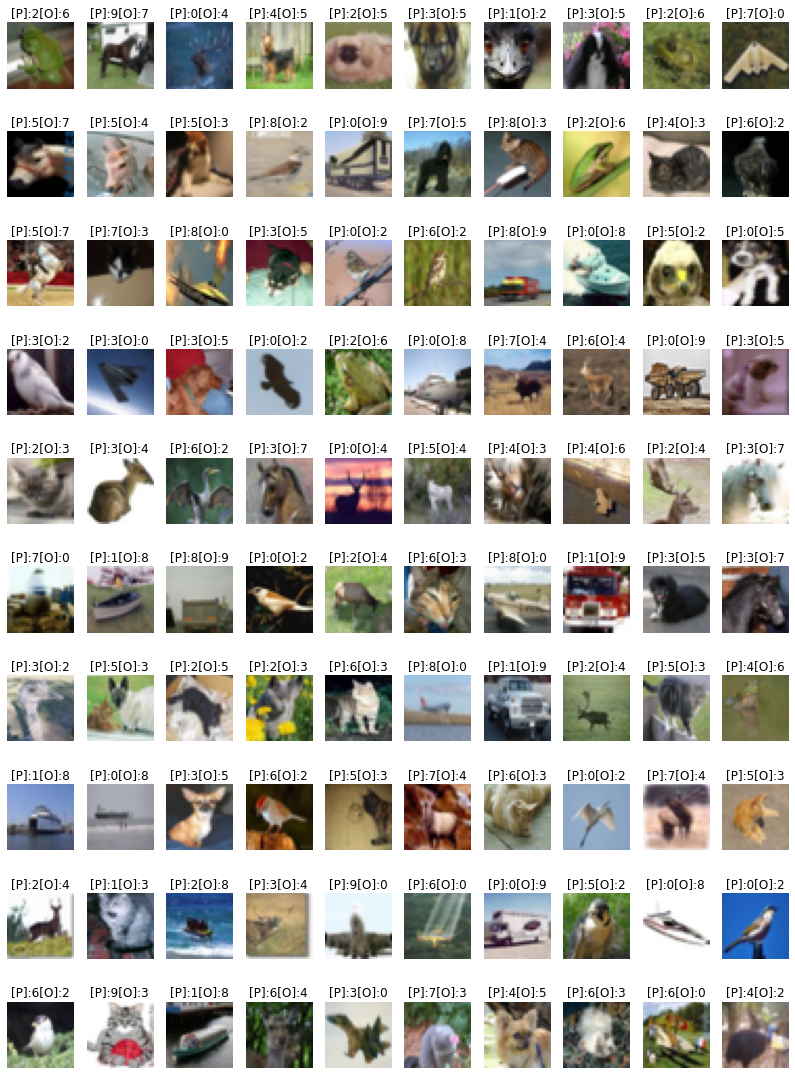

In [17]:
# 設定畫布尺寸
plt.figure(figsize=(14, 450))

# 設定圖片寬高
w = 10
h = int(len(imgfalse) / 10) + 1  # 25

# 印出預測錯的圖片，P -> 預測數字，O -> 正確數字
for (i, img) in enumerate(imgfalse[0:100]):

  # 將畫布分成數塊做出小圖(列數， 行數， 第幾張圖開始)
  plt.subplot(h, w, i + 1)

  # 取消XY座標軸
  plt.axis("off")

  # 每個圖的標題
  t = "[P]:" + str(prefalse[i]) + "[O]:" + str(orifalse[i])
  plt.title(t)
  plt.imshow(img)